In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


MENACE (Matchbox Educable Noughts and Crosses Engine)

In [7]:

class MENACE:
    def __init__(self):
        self.states = {}  # Stores possible moves for each board state
        self.history = [] # Stores moves in current game
    
    def available_moves(self, board):
        return [i for i in range(9) if board[i] == 0]
    
    def select_move(self, board):
        board_tuple = tuple(board)
        if board_tuple not in self.states:
            # Initialize beads (3 per available move)
            self.states[board_tuple] = {i:3 for i in self.available_moves(board)}
        
        moves, weights = zip(*self.states[board_tuple].items())
        chosen_move = random.choices(moves, weights=weights)[0]
        self.history.append((board_tuple, chosen_move))
        return chosen_move
    
    def update_beads(self, result):
        for board_tuple, move in self.history:
            if result == 'win':
                self.states[board_tuple][move] += 3  # Reward
            elif result == 'lose':
                self.states[board_tuple][move] = max(1, self.states[board_tuple][move]-1)  # Penalize
            # draw: do nothing
        self.history = []

def check_winner(board):
    combos = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
    for a,b,c in combos:
        if board[a]==board[b]==board[c] != 0:
            return board[a]
    if 0 not in board:
        return 'draw'
    return None

def play_menace(agent1, agent2, episodes=1000):
    results = {'agent1':0, 'agent2':0, 'draw':0}
    for _ in range(episodes):
        board = [0]*9
        turn = 1
        while True:
            if turn == 1:
                move = agent1.select_move(board)
                board[move] = 1
            else:
                move = agent2.select_move(board)
                board[move] = 2
            winner = check_winner(board)
            if winner:
                if winner == 1:
                    results['agent1'] += 1
                    agent1.update_beads('win')
                    agent2.update_beads('lose')
                elif winner == 2:
                    results['agent2'] += 1
                    agent1.update_beads('lose')
                    agent2.update_beads('win')
                else:
                    results['draw'] += 1
                    agent1.update_beads('draw')
                    agent2.update_beads('draw')
                break
            turn = 3 - turn
    return results

# Example: play MENACE vs random agent
class RandomAgent:
    def select_move(self, board):
        return random.choice([i for i in range(9) if board[i]==0])
    def update_beads(self, result):
        pass

menace_agent = MENACE()
random_agent = RandomAgent()
results = play_menace(menace_agent, random_agent, episodes=500)
print("MENACE vs Random:", results)



MENACE vs Random: {'agent1': 293, 'agent2': 148, 'draw': 59}


Binary Bandit Environment

In [8]:
class BinaryBandit:
    def __init__(self, p1, p2):
        # Probabilities of reward for each arm
        self.probs = [p1, p2]
    
    def pull(self, action):
        return 1 if np.random.rand() < self.probs[action] else 0


Epsilon-Greedy Agent

In [9]:
class EpsilonGreedyAgent:
    def __init__(self, n_actions, epsilon=0.1):
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.q_values = np.zeros(n_actions)
        self.n_selected = np.zeros(n_actions)
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        return np.argmax(self.q_values)
    
    def update(self, action, reward):
        self.n_selected[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.n_selected[action]


Run Binary Bandit

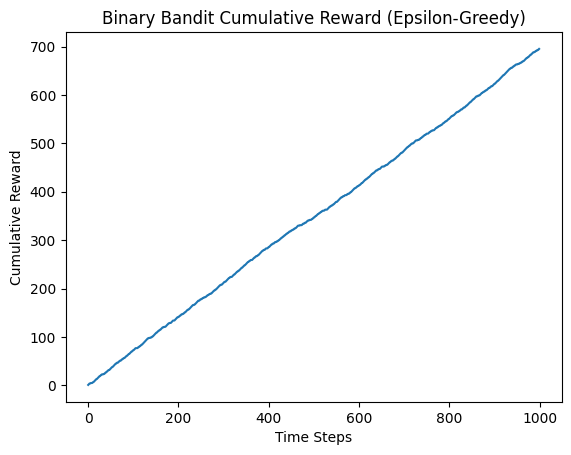

In [10]:
# Binary Bandit example
bandit = BinaryBandit(p1=0.7, p2=0.3)
agent = EpsilonGreedyAgent(n_actions=2, epsilon=0.1)

rewards = []
for t in range(1000):
    action = agent.select_action()
    reward = bandit.pull(action)
    agent.update(action, reward)
    rewards.append(reward)

# Plot cumulative reward
plt.plot(np.cumsum(rewards))
plt.title("Binary Bandit Cumulative Reward (Epsilon-Greedy)")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.show()


10-Armed Non-Stationary Bandit Environment

In [11]:
class NonStationaryBandit:
    def __init__(self, n_actions=10):
        self.n_actions = n_actions
        self.means = np.zeros(n_actions)
    
    def pull(self, action):
        reward = np.random.normal(self.means[action], 1)
        # Random walk for all means
        self.means += np.random.normal(0, 0.01, self.n_actions)
        return reward


Modified Epsilon-Greedy for Non-Stationary Bandit

In [13]:
class ModifiedEpsilonGreedy:
    def __init__(self, n_actions, epsilon=0.1, alpha=0.1):
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.q_values = np.zeros(n_actions)
        self.alpha = alpha  # constant step-size for non-stationary rewards
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        return np.argmax(self.q_values)
    
    def update(self, action, reward):
        self.q_values[action] += self.alpha * (reward - self.q_values[action])


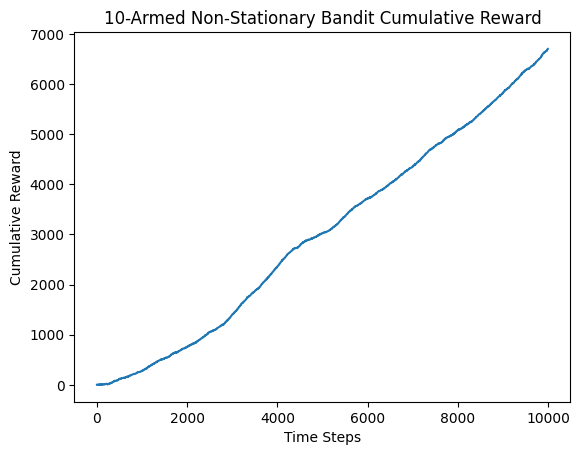

In [14]:
bandit = NonStationaryBandit(n_actions=10)
agent = ModifiedEpsilonGreedy(n_actions=10, epsilon=0.1, alpha=0.1)

rewards = []
for t in range(10000):
    action = agent.select_action()
    reward = bandit.pull(action)
    agent.update(action, reward)
    rewards.append(reward)

plt.plot(np.cumsum(rewards))
plt.title("10-Armed Non-Stationary Bandit Cumulative Reward")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.show()
